In [867]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import bigrams, trigrams
nltk.download('stopwords')
nltk.download("punkt_tab")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger_eng")
nltk.download('wordnet')

blue_gray_cmap = LinearSegmentedColormap.from_list(
    "blue_gray",
    ["#2d4ca3", "#8e8e8e"]   
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/orincon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/orincon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/orincon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/orincon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/orincon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [868]:
# Utilities
def load_text(path):
    chunks = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            chunks.append(line.lower())
    return "".join(chunks)

# Load text
text = load_text("data/text.txt")

In [869]:
df_stopwords = pd.read_csv("stop_words.csv")
CUSTOM_STOPWORDS = set(df_stopwords["word"].str.lower())
 

In [870]:
ALLOWED_POS = ("NN", "NNS", "NNP", "NNPS", "JJ", "JJR", "JJS")

In [871]:
ACRONYMS = {"pinn", "dnn", "cnn", "gpu", "fwi", "rnn", "fno","gan","fdm","mlp"}

In [872]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
stop_words.update(CUSTOM_STOPWORDS)

In [873]:
def remove_consecutive_duplicates(tokens):
    return [t for i, t in enumerate(tokens) if i == 0 or t != tokens[i-1]]

In [874]:
# --------------------------------------------------
# TEXT CLEANING
# --------------------------------------------------

text_ = text.lower()

# remove numbers
text_ = re.sub(r"\d+", " ", text_)


# keep hyphens to avoid splitting scientific terms
text_ = re.sub(r"[^\w\s-]", " ", text_)

# normalize hyphens
text_ = re.sub(r"-+", " ", text_)


text_ = re.sub(r"\b(\w+)\s+\1\b", r"\1", text_)

# tokenize
tokens = word_tokenize(text_)

# --------------------------------------------------
# PROTECT MULTI-WORD EXPRESSIONS (BI + TRI GRAMS)
# --------------------------------------------------

token_bigrams = list(bigrams(tokens))
token_trigrams = list(trigrams(tokens))

 

# --------------------------------------------------
# POS TAGGING + FILTERING
# --------------------------------------------------

pos_tags = nltk.pos_tag(tokens)

filtered_tokens = []

for word, pos in pos_tags:

    if pos not in ALLOWED_POS:
        continue

    if not word.isalpha():
        continue

    lemma = lemmatizer.lemmatize(word.lower())

 
    # remove short tokens
    if len(lemma) <= 2:
        continue

    # skip stopwords
    if lemma in stop_words:
        continue


    # avoid duplicates for acronyms
    if lemma in ACRONYMS:
        if lemma not in filtered_tokens:
            filtered_tokens.append(lemma)
        continue

    filtered_tokens.append(lemma)
 
 

filtered_tokens = remove_consecutive_duplicates(filtered_tokens)

# --------------------------------------------------
# RESULTS
# --------------------------------------------------

word_counts = Counter(filtered_tokens)
clean_text = " ".join(filtered_tokens)

# save cleaned text
with open("data/clean_text.txt", "w", encoding="utf-8") as f:
    f.write(clean_text)

In [875]:
len(tokens)

332505

In [876]:
len(filtered_tokens)

31253

In [877]:
print(clean_text)

decoder surrogate reverse migration rodolfo freitasa carlos barbosaa gabriel guerrab alvaro coutinhoa rochinhaa coppe federal rio janeiro brazil mechanical federal fluminense brazil info reverse migration surrogate positioning migration highresolution migration localization intensive monte carlo fold dimensionality decoder surrogate experimentation surrogate salient industry horizon conjunction specialized optical illuminating email rodolfosmfreitas com rodolfo mecanica coppe ufrj rochinha orcid barbosa coutinho rochinha decoder surrogate reverse migration complicated excitation physicsbased query quantified monte carlo plausible approximate prone propagated outer loop sequential probabilistic plausible probabilistic tomography stochastic fwi hence seismogram migration migrated reverse migration reflector migration industry post horizon resulting quantified seismogram propagate seismogram carlo post horizon probabilistic replacing uncertain ver decoder surrogate reverse migration locit

In [878]:
WORD_GROUPS = {
    "PINN": ["pinn", "physics informed neural network", "physics-informed neural network"],
    "DNN": ["dnn", "deep neural network", "deep neural networks"],
    "FEM": ["fem", "finite element method", "finite elements"],
    "BEM": ["bem", "boundary element method"],
    "CNN": ["cnn", "convolutional neural network"],
    "acoustic": ["acoustic", "acoustics"],
}

GROUP_LOOKUP = {}

for canonical, variants in WORD_GROUPS.items():
    for v in variants:
        GROUP_LOOKUP[v] = canonical

In [879]:
grouped_tokens = []

for token in filtered_tokens:
    token_lower = token.lower()

    if token_lower in GROUP_LOOKUP:
        grouped_tokens.append(GROUP_LOOKUP[token_lower])
    else:
        grouped_tokens.append(token)

In [880]:
clean_text = " ".join(grouped_tokens)

 

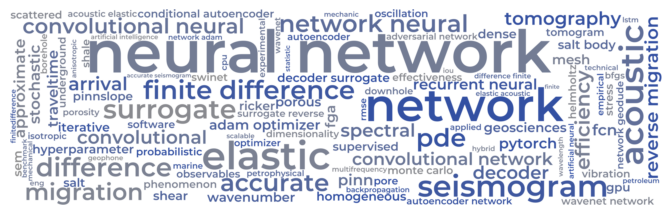

In [881]:
wc = WordCloud(
    font_path="Montserrat-SemiBold.ttf",
    background_color="white",
    colormap=blue_gray_cmap,
    prefer_horizontal=0.7,
    max_words=110,
    width=5000,
    height=int(5000*0.3),
    random_state=4,
    min_font_size=10,
    max_font_size=450
)

wc.generate(clean_text)

plt.figure(figsize=(6.8, (6.8*0.3)), constrained_layout=True)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig("figs/wordcloud.svg", dpi=300)
plt.show()
 

In [882]:
wc.words_

{'neural network': 1.0,
 'network': 0.5559071729957806,
 'elastic': 0.38396624472573837,
 'acoustic': 0.2616033755274262,
 'seismogram': 0.21835443037974683,
 'surrogate': 0.17088607594936708,
 'difference': 0.16244725738396623,
 'finite difference': 0.16244725738396623,
 'pde': 0.1540084388185654,
 'accurate': 0.14345991561181434,
 'network neural': 0.14029535864978904,
 'migration': 0.13291139240506328,
 'convolutional neural': 0.10548523206751055,
 'efficiency': 0.09599156118143459,
 'convolutional': 0.08122362869198312,
 'arrival': 0.08122362869198312,
 'tomography': 0.07911392405063292,
 'spectral': 0.07805907172995781,
 'decoder': 0.0770042194092827,
 'reverse migration': 0.0759493670886076,
 'convolutional network': 0.07278481012658228,
 'fcn': 0.05590717299578059,
 'pinn': 0.05485232067510549,
 'approximate': 0.05379746835443038,
 'stochastic': 0.05379746835443038,
 'recurrent neural': 0.05168776371308017,
 'traveltime': 0.049578059071729956,
 'pytorch': 0.049578059071729956,
 

In [883]:

df = pd.DataFrame(
    wc.words_.keys(),
    columns=["word"]
)

df.to_csv("wordcloud_words.csv", index=False)